# meng 21200 pset 4

### init

In [635]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.integrate import simpson as simp
from scipy.integrate import solve_ivp as ivp

import scipy

In [636]:
# Available data for S-LMOPs for anodic scan
V_sa = [-0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2]
a1_sa = [-0.193, -0.0641, -0.00884, -0.00135, -0.00233, -0.00638,
-0.00984, -0.0075, -0.00255, 0.00511, 0.294]
a2_sa = [-0.409, -0.055, -0.0216, -0.00592, 0.0122, 0.0526,
0.213, 0.569, 1.14, 1.75, 0.461]

# Available data for S-LMOPs for cathodic scan
V_sc = [-0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2]
a1_sc = [-0.193, -0.139, -0.121, -0.056, -0.0163, -0.0241, -
0.0373, 0.0265, 0.0748, 0.121, 0.294]
a2_sc = [-0.409, -0.432, -0.386, -0.669, -0.749, -0.583, -0.519,
-0.421, -0.348, -0.155, 0.461]

# Available data for B-LMOPs for anodic scan
V_ba = [-0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2,
1.4]
a1_ba = [-0.0197, -0.00307, -0.000654, -0.0000707, -0.0000663, -
0.000131, -0.00105, 0.00229, 0.0026, -0.0074, 0.00158, 0.00144]
a2_ba = [-0.106, -0.0362, -0.00174, 0.000157, 0.0000338,
0.000332, 0.0116, 0.0283, 0.0649, 0.182, 0.225, 0.297]

# Available data for B-LMOPs for cathodic scan
V_bc = [-0.8, -0.6, -0.4, 0, 0.4, 0.8, 1.0, 1.2, 1.4]
a1_bc = [-0.0197, -0.00174, 0.00204, 0.00486, 0.00352, 0.000425,
-0.000795, 0.000963, 0.00144]
a2_bc = [-0.106, -0.15, -0.111, -0.0796, -0.0524, 0.0337, 0.08,
0.151, 0.297]

#Scan rate
V = [2,5,10,20,50]

### problem 1

a

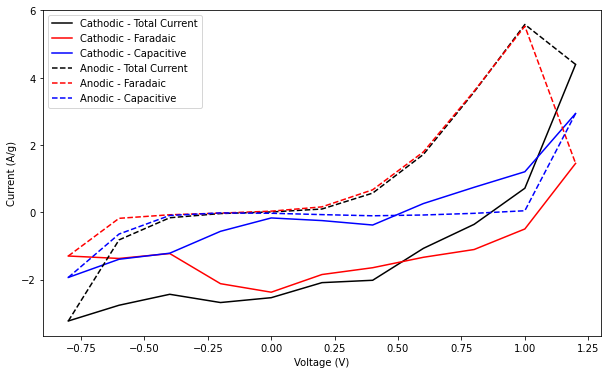

In [637]:
v = 10

cathodeC = [a1_sc[i] * v for i in range(11)]
cathodeF = [a2_sc[i] * v ** 0.5 for i in range(11)]
cathode = [cathodeC[i] + cathodeF[i] for i in range(11)]

anodeC = [a1_sa[i] * v for i in range(11)]
anodeF = [a2_sa[i] * v ** 0.5 for i in range(11)]
anode = [anodeC[i] + anodeF[i] for i in range(11)]

plt.figure(figsize=(10,6))
plt.xlabel('Voltage (V)')
plt.ylabel('Current (A/g)')

plt.plot(V_sc, cathode, label = 'Cathodic - Total Current', color = 'black')
plt.plot(V_sc, cathodeF, label = 'Cathodic - Faradaic', color = 'red')
plt.plot(V_sc, cathodeC, label = 'Cathodic - Capacitive', color = 'blue')

plt.plot(V_sa, anode, label = 'Anodic - Total Current', color = 'black', linestyle='--')
plt.plot(V_sa, anodeF, label = 'Anodic - Faradaic', color = 'red', linestyle='--')
plt.plot(V_sa, anodeC, label = 'Anodic - Capacitive', color = 'blue', linestyle='--')
plt.legend()


b

In [638]:
capC = simp(anodeC, V_sa) - simp(cathodeC, V_sc)
capF = simp(anodeF, V_sa) - simp(cathodeF, V_sc)
capS = capC + capF
print(f'Faradaic % contribution = {round(capF / capS * 100, 2)}%')

Faradaic % contribution = 98.23%


c

In [639]:
cathodeC = [a1_bc[i] * v for i in range(9)]
cathodeF = [a2_bc[i] * v ** 0.5 for i in range(9)]
cathode = [cathodeC[i] + cathodeF[i] for i in range(9)]

anodeC = [a1_ba[i] * v for i in range(12)]
anodeF = [a2_ba[i] * v ** 0.5 for i in range(12)]
anode = [anodeC[i] + anodeF[i] for i in range(12)]

capC = simp(anodeC, V_ba) - simp(cathodeC, V_bc)
capF = simp(anodeF, V_ba) - simp(cathodeF, V_bc)
capB = capC + capF
print(f'S-LMOP capacity = {round(capS, 2)}')
print(f'B-LMOP capacity = {round(capB, 2)}')
print(f'ratio = {round(capS / capB, 2)}')

S-LMOP capacity = 5.36
B-LMOP capacity = 0.45
ratio = 11.88


The authors of the study concluded that stored charge in small particles is around 10 times that in big ones. Our data found that the ratio is around 12 times, which is fairly consistent with the authors' findings.

### problem 2

a

In [640]:
def f(x):
    return np.exp(-(x**2))

def gauss(f, a, b):
    return (b - a) / 2 * (f(-1 / (3**0.5) + (b + a) / 2) + f(1 / (3**0.5) + (b + a) / 2))

approx = 2 * gauss(f, 0, 1.5) / (np.pi**(0.5))
print(f'gaussian quadrature approx = {approx}')

gaussian quadrature approx = 0.9667591509717425


b

In [641]:
ans = scipy.integrate.quad(f, 0, 1.5)[0]
approx = 2 * ans / (np.pi**(0.5))
print(f'built-in gaussian quadrature approx = {approx}')

built-in gaussian quadrature approx = 0.9661051464753108


### problem 3

abc

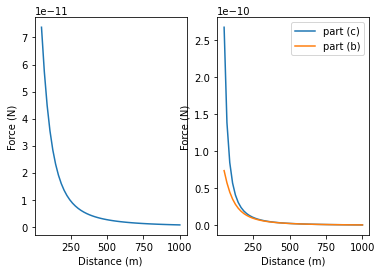

In [642]:
G = 6.67408*10**-11
zlist = np.linspace(50, 1000)

def f(x, y, z):
    return 1/(x**2+y**2+z**2)**(3/2)
def F(z):
    return G * 10000 / (z**2)
def integrate(z):
    a = lambda x, r=100:-(10000 - x**2)**0.5
    b = lambda x, r=100: (10000 - x**2)**0.5

    return G / np.pi * z * scipy.integrate.dblquad(f, -100, 100,a, b, args=(z,))[0]

flist = [integrate(i) for i in zlist]
Flist = [F(i) for i in zlist]
plt.subplot(1, 2, 1)
plt.xlabel('Distance (m)')
plt.ylabel('Force (N)')
plt.plot(zlist, flist)

plt.subplot(1, 2, 2)
plt.xlabel('Distance (m)')
plt.ylabel('Force (N)')
plt.plot(zlist, Flist, label='part (c)')
plt.plot(zlist, flist, label='part (b)')
plt.legend()

### problem 4

In [643]:
def f(x, y):
    return np.sin(x) - y

a

In [644]:
def euler(f, xi, xf, y0, h):
    ans = []
    while xi <= xf:
        ans.append(y0)
        xi += h
        y0 += h * f(xi, y0)
    return ans

b

In [645]:
def heun(f, xi, xf, y0, h):
    ans = []
    while xi <= xf:
        ans.append(y0)
        xi += h
        y0 += h * (f(xi - h, y0) + f(xi, y0 + h * f(xi - h, y0))) / 2
    return ans

c

Text(0, 0.5, 'y')

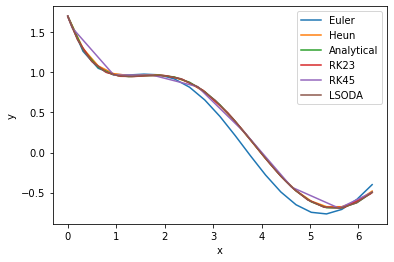

In [646]:
elist = []
hlist = []
for i in range(7):
    elist.append(euler(f, 0, 2 * np.pi, 1.7, np.pi * 10 ** -i))
    hlist.append(heun(f, 0, 2 * np.pi, 1.7, np.pi * 10 ** -i))

rk23 = ivp(f, [0, 2 * np.pi], [1.7], method='RK23')
rk45 = ivp(f, [0, 2 * np.pi], [1.7], method='RK45')
lsoda = ivp(f, [0, 2 * np.pi], [1.7], method='LSODA')

def analytical(x):
    return 2.2 * np.exp(-x) + np.sin(x) / 2 - np.cos(x) / 2

xlist = np.arange(0, 2.1 * np.pi, 0.1 * np.pi)

plt.plot(xlist, elist[1], label='Euler')
plt.plot(xlist, hlist[1], label='Heun')
plt.plot(xlist, analytical(xlist), label='Analytical')
plt.plot(rk23.t, rk23.y.flatten(), label='RK23')
plt.plot(rk45.t, rk45.y.flatten(), label='RK45')
plt.plot(lsoda.t, lsoda.y.flatten(), label='LSODA')

plt.legend()
plt.xlabel('x')
plt.ylabel('y')

d

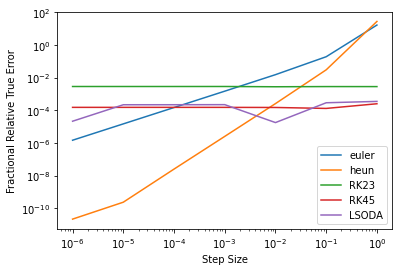

In [647]:
def error(y):
    true = analytical(2 * np.pi)
    return abs((y - true) / true)

errorsE = [error(elist[i][-1]) for i in range(7)]
errorsH = [error(hlist[i][-1]) for i in range(7)]
errors1 = [error(ivp(f, [0, 2 * np.pi], [1.7], method='RK23', first_step=np.pi / 10 ** i).y.flatten()[-1]) for i in range(7)]
errors2 = [error(ivp(f, [0, 2 * np.pi], [1.7], method='RK45', first_step=np.pi / 10 ** i).y.flatten()[-1]) for i in range(7)]
errors3 = [error(ivp(f, [0, 2 * np.pi], [1.7], method='LSODA', first_step=np.pi / 10 ** i).y.flatten()[-1]) for i in range(7)]

slist = [10 ** -i for i in range(7)]

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Step Size")
plt.ylabel("Fractional Relative True Error")
plt.plot(slist, errorsE, label='euler')
plt.plot(slist, errorsH, label='heun')
plt.plot(slist, errors1, label='RK23')
plt.plot(slist, errors2, label='RK45')
plt.plot(slist, errors3, label='LSODA')
plt.legend()

The built-in methods did not see significant change in error in step size, while Euler and Heun methods saw error decrease as step size decreases. Of the two, Heun generally has smaller error.

### problem 5

In [648]:
def H(x, h):
    return -(0.55 * a * (2 * 9.81 * h) ** 0.5) / (2 * np.pi * 1.5 * h - np.pi * h ** 2)
def rk(x, y, step):
    k1 = H(x, y)
    k2 = H(x + 0.5 * step, y + 0.5 * k1 * step)
    k3 = H(x + 0.5 * step, y + 0.5 * k2 * step)
    k4 = H(x + step, y + k3 * step)

    return y + (k1 + 2 * k2 + 2 * k3 + k4) / 6
i = 0
max = 10000000
step = 0.01
tol = 0.01
a = 0.015 ** 2 * np.pi
x = 0
y = 2.75

while i <= max and y > tol:
    y = rk(x, y, step)
    i += 1
    if isinstance(y, complex) or y < tol:
        break
if i > max:
    print('unsuccessful')
else:
    print(f'It takes {i} seconds to drain')

It takes 7485 seconds to drain


### problem 6

a

In [649]:
def sum(t, v):
    return np.array([-10 * v[0] + 10 * v[1], 28 * v[0] - v[1] - v[0] * v[2], -2.666667 * v[2] + v[0] * v[1]])

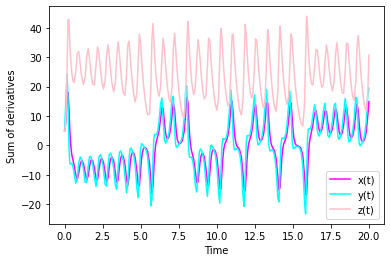

In [650]:
def graph(a):
    soln = ivp(sum, [0, 20], [a, 5, 5], method='RK45')
    plt.xlabel('Time')
    plt.ylabel('Sum of derivatives')

    plt.plot(soln.t, soln.y[0], color = 'magenta', label='x(t)')
    plt.plot(soln.t, soln.y[1], color = 'cyan', label='y(t)')
    plt.plot(soln.t, soln.y[2], color = 'pink', label='z(t)')
    plt.legend()

graph(5)

b

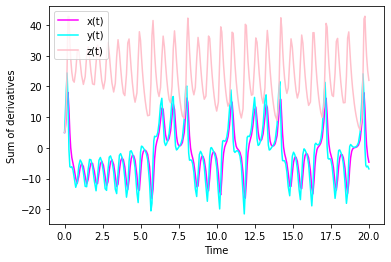

In [651]:
graph(5.001)

z(t) looks quite similar
x(t) and y(t) start off looking similar, but look very different after around t = 14

c

Text(0.5, 0, 'z')

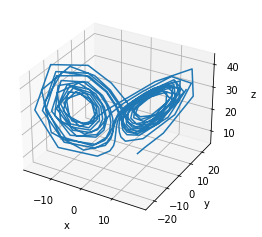

In [652]:
soln = ivp(sum, [0, 20], [5, 5, 5], method='RK45')
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot(soln.y[0], soln.y[1], soln.y[2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')